In [8]:
%matplotlib inline
import easyaccess as ea
import healpy
import matplotlib.pyplot as plt
import cx_Oracle as cx
print('cx_Oracle version : {0}'.format(cx.__version__))
print('easyaccess version : {0}'.format(ea.__version__))

cx_Oracle version : 5.3
easyaccess version : 1.4.3


In [9]:
con = ea.connect('dessci')

Connecting to DB ** dessci ** ...


In [10]:
con.do_show_db('')


user: MCARRAS2
db  : DESSCI
host: DESDB.NCSA.ILLINOIS.EDU

Personal links:

   OWNER  DB_LINK  USERNAME  HOST  CREATED  
No rows selected



In [11]:
query = 'SELECT * from Y3A2_SPATIAL sample(0.02) ' # Select 0.02 % random sample

In [12]:
DF = con.query_to_pandas(query)

In [13]:
DF.tail(3)

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO
79750,208261393,DES2134-4123,3063701559,-36.380487,-41.170567,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca333d80>
79751,208297410,DES2134-4123,3063511317,-36.938831,-41.635014,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca333db0>
79752,208284060,DES2134-4123,3063686401,-36.604773,-41.453675,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca333de0>


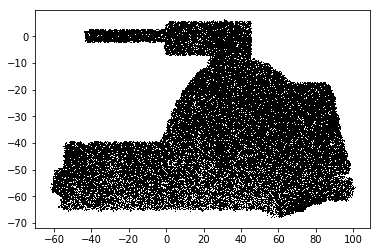

In [14]:
plt.plot(DF.RA,DF.DEC,'k,')

## Distances are in radians

### Find 10 nearest neighbors from a Coadd Id object

In [15]:
search = """
SELECT C.*,S.COADD_OBJECT_ID
FROM Y3A2_SPATIAL C, Y3A2_SPATIAL S 
WHERE S.COADD_OBJECT_ID in ({0}) AND sdo_nn (C.GEO, S.GEO, 'sdo_num_res=10') = 'TRUE';
""".format(DF.COADD_OBJECT_ID.ix[0])

In [16]:
NN = con.query_to_pandas(search)

In [17]:
NN

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO,COADD_OBJECT_ID
0,263935070,DES0157+0252,1169632005,29.274502,2.696187,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caeba990>,263935070
1,263934968,DES0157+0252,1169632016,29.280486,2.698256,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caeba9f0>,263935070
2,263935355,DES0157+0252,1169631662,29.275360,2.690131,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebaa20>,263935070
3,263935175,DES0157+0252,1169631663,29.277299,2.693963,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebaa50>,263935070
4,263935113,DES0157+0252,1169631674,29.281194,2.695137,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebaa80>,263935070
5,263934845,DES0157+0252,1169632018,29.276032,2.700626,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebaab0>,263935070
6,263934868,DES0157+0252,1169632013,29.268773,2.700363,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebaae0>,263935070
7,263935210,DES0157+0252,1169632004,29.274639,2.693181,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebab10>,263935070
8,263935040,DES0157+0252,1169632007,29.272967,2.696891,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebab40>,263935070
9,263935122,DES0157+0252,1169632005,29.274485,2.695256,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebab70>,263935070


### Search 20 closest neighbors to a given point order by distance (radians)

In [19]:
search_point = """
SELECT C.*,    sdo_nn_distance (1) distance
FROM Y3A2_SPATIAL C
WHERE sdo_nn (C.GEO,
MDSYS.SDO_GEOMETRY(2001, 2, MDSYS.SDO_POINT_TYPE ({0},{1},NULL), NULL, NULL),
'sdo_num_res=20 unit=m',1) = 'TRUE' 
ORDER BY distance;
""".format(29.533,-14.748)  ## This is the search position

In [20]:
closest = con.query_to_pandas(search_point)

In [21]:
closest

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO,DISTANCE
0,65429896,DES0158-1458,2397630570,29.533349,-14.748509,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebafc0>,0.000011
1,65429718,DES0158-1458,2397630570,29.532257,-14.747301,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebad50>,0.000017
2,65429710,DES0158-1458,2397630570,29.533994,-14.747011,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebabd0>,0.000024
3,65430017,DES0158-1458,2397630527,29.531994,-14.749924,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebac30>,0.000038
4,65429711,DES0158-1458,2397630613,29.529886,-14.747127,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebacc0>,0.000055
5,65429912,DES0158-1458,2397630568,29.537179,-14.748812,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebadb0>,0.000072
6,65430397,DES0158-1458,2397630525,29.532528,-14.752994,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebade0>,0.000088
7,65429630,DES0158-1458,2397630613,29.527225,-14.746605,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebae10>,0.000100
8,65430419,DES0158-1458,2397630519,29.537079,-14.753476,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebae40>,0.000118
9,65429712,DES0158-1458,2397630615,29.525978,-14.747065,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75caebae70>,0.000120


(-16, -14)

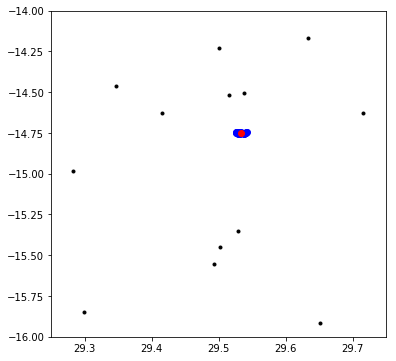

In [30]:
plt.figure(figsize=(6,6))
plt.plot(DF.RA,DF.DEC,'k.')
plt.plot(closest.RA, closest.DEC , 'bo')
plt.plot(29.533,-14.748,'ro')
plt.xlim(29.25,29.75)
plt.ylim(-16,-14)

### search all points in a circle

In [31]:
search_circle = """
SELECT C.*
FROM Y3A2_SPATIAL C
WHERE MDSYS.SDO_WITHIN_DISTANCE(C.GEO,
MDSYS.SDO_GEOMETRY(2001, 2, MDSYS.SDO_POINT_TYPE ({0},{1},NULL), NULL, NULL),
'distance = 0.002') = 'TRUE'
""".format(29.533,-14.748)


In [32]:
dff=con.query_to_pandas(search_circle)

In [33]:
dff.tail(2)

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO
3304,65441011,DES0158-1458,2397627488,29.454912,-14.831169,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca2fbe40>
3305,65441007,DES0158-1458,2397627488,29.455808,-14.831141,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca2fbe70>


(-15, -14)

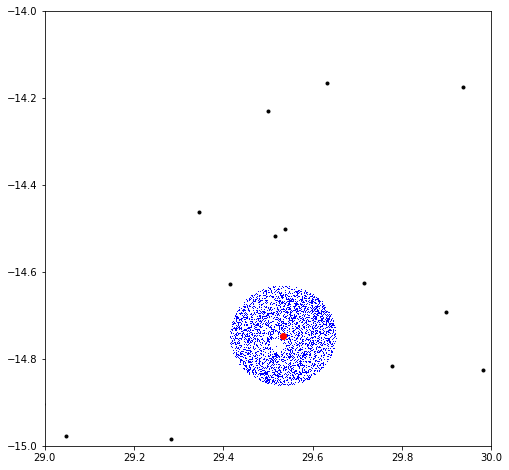

In [34]:
plt.figure(figsize=(8,8))
plt.plot(DF.RA,DF.DEC,'k.')
plt.plot(dff.RA, dff.DEC , 'b,')
plt.plot(29.533,-14.748,'ro')
plt.xlim(29.,30)
plt.ylim(-15,-14)


### search points insied any polygon, in this case a 'square'

In [35]:
search_pol = """
SELECT C.*
FROM Y3A2_SPATIAL C
WHERE MDSYS.SDO_RELATE(C.GEO,
    MDSYS.SDO_GEOMETRY(
    2003, 
    2, 
    NULL, 
    MDSYS.SDO_ELEM_INFO_ARRAY(1,1003,3), 
    MDSYS.SDO_ORDINATE_ARRAY(29,-15, 30,-14)), 'mask=ANYINTERACT') = 'TRUE'
"""

In [36]:
df_pol=con.query_to_pandas(search_pol)

In [37]:
df_pol.tail(2)

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO
72625,262636630,DES0155-1458,2397708094,29.000396,-14.674106,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75c8908a80>
72626,262636361,DES0155-1458,2397708181,28.999820,-14.669888,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75c8908ab0>


(-15, -14)

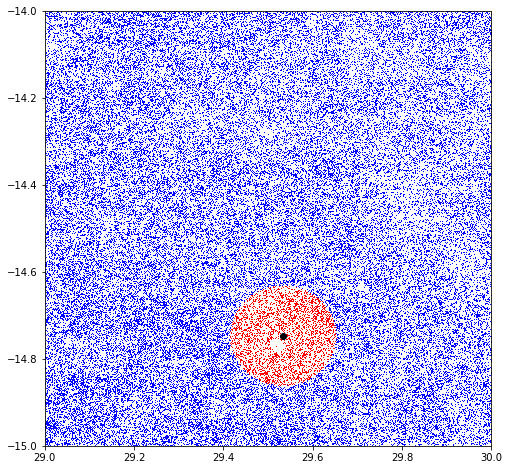

In [38]:
plt.figure(figsize=(8,8))
plt.plot(df_pol.RA, df_pol.DEC , 'b,')
plt.plot(dff.RA, dff.DEC , 'r,')
plt.plot(29.533,-14.748,'ko')
plt.xlim(29.,30)
plt.ylim(-15,-14)


### any shape

In [39]:
search_any = """
SELECT C.*
FROM Y3A2_SPATIAL C
WHERE MDSYS.SDO_RELATE(C.GEO,
    MDSYS.SDO_GEOMETRY(
    2003, 
    2, 
    NULL, 
    MDSYS.SDO_ELEM_INFO_ARRAY(1,1003,1), 
    MDSYS.SDO_ORDINATE_ARRAY(29.2,-14.6,29.4,-14.55,29.3,-14.4,29.43,-14.2,29.2,-14.1,29.2,-14.6)), 'mask=ANYINTERACT') = 'TRUE'
"""

In [40]:
df_shape=con.query_to_pandas(search_any)

In [41]:
df_shape.tail(2)

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO
5152,262132366,DES0156-1415,2397719665,29.203910,-14.589509,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75cae6b2d0>
5153,262132341,DES0156-1415,2397719645,29.214333,-14.588975,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75cae6b300>


(-15, -14)

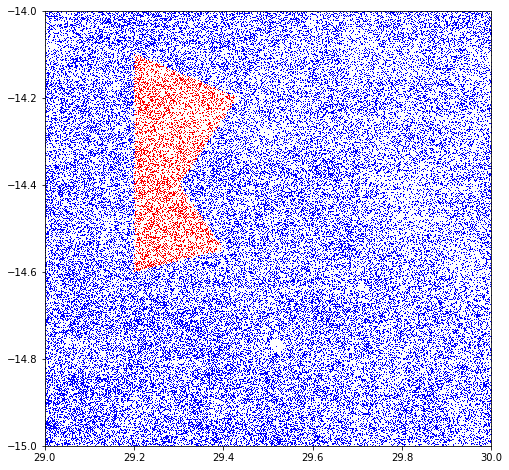

In [42]:
plt.figure(figsize=(8,8))
plt.plot(df_pol.RA, df_pol.DEC , 'b,')
plt.plot(df_shape.RA, df_shape.DEC , 'r,')
plt.xlim(29.,30)
plt.ylim(-15,-14)


### all points within a distance  (radians) from 2 random objects

In [57]:
search_circles = """
SELECT C.*, S.COADD_OBJECT_ID as SID
FROM Y3A2_SPATIAL C, Y3A2_SPATIAL S
WHERE 
S.COADD_OBJECT_ID in ({0},{1}) AND
MDSYS.SDO_WITHIN_DISTANCE(C.GEO, S.GEO,
'distance = 0.002') = 'TRUE'
""".format(df_pol.COADD_OBJECT_ID.ix[12300],df_pol.COADD_OBJECT_ID.ix[42000])

In [52]:
df_circles = con.query_to_pandas(search_circles)

In [53]:
df_circles

,COADD_OBJECT_ID,TILENAME,HPIX_16384,RA,DEC,GEO,SID
0,65320428,DES0201-1458,2397645215,30.005290,-14.779320,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df120>,65437717
1,65320177,DES0201-1458,2397645280,30.004559,-14.773736,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df1b0>,65437717
2,65320672,DES0201-1458,2397645206,30.006639,-14.784153,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df1e0>,65437717
3,65321994,DES0201-1458,2397645066,30.006505,-14.814053,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df240>,65437717
4,65321895,DES0201-1458,2397645089,30.006231,-14.811324,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df270>,65437717
5,65322031,DES0201-1458,2397645066,30.006938,-14.814934,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df2a0>,65437717
6,65321385,DES0201-1458,2397645101,30.004832,-14.799817,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df300>,65437717
7,65321821,DES0201-1458,2397645089,30.007400,-14.811440,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df330>,65437717
8,65320810,DES0201-1458,2397645203,30.004069,-14.787016,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df360>,65437717
9,65321493,DES0201-1458,2397645095,30.007762,-14.801786,<cx_Oracle.Object MDSYS.SDO_GEOMETRY at 0x7f75ca7df390>,65437717


In [61]:
qpairs2="""
SELECT C.COADD_OBJECT_ID
FROM Y3A2_SPATIAL C
WHERE MDSYS.SDO_RELATE(C.GEO,
    MDSYS.SDO_GEOMETRY(
    2003, 
    2, 
    NULL, 
    MDSYS.SDO_ELEM_INFO_ARRAY(1,1003,3), 
    MDSYS.SDO_ORDINATE_ARRAY(29,-15,30,-14)), 'mask=ANYINTERACT') = 'TRUE'
"""

In [62]:
pairs2=con.query_to_pandas(qpairs2) # objects inside a square

In [63]:
pairs.tail(2)

,COADD_OBJECT_ID
72522,62516906
72523,62523827


In [65]:
qpairsnn="""
SELECT C.COADD_OBJECT_ID, S.COADD_OBJECT_ID, sdo_nn_distance (1) distance
FROM Y3A2_SPATIAL C, Y3A2_SPATIAL S
WHERE 
    MDSYS.SDO_RELATE(S.GEO,
    MDSYS.SDO_GEOMETRY(
    2003, 
    2, 
    NULL, 
    MDSYS.SDO_ELEM_INFO_ARRAY(1,1003,3), 
    MDSYS.SDO_ORDINATE_ARRAY(29,-15,30,-14)), 'mask=ANYINTERACT') = 'TRUE' 
AND
    MDSYS.SDO_NN (C.GEO, S.GEO, 'sdo_num_res=2',1) = 'TRUE'
    ORDER by distance;
    
"""
qpairstest="""
SELECT S.COADD_OBJECT_ID, C.COADD_OBJECT_ID CLOSEST, sdo_nn_distance (1) distance
FROM Y3A2_SPATIAL C, Y3A2_SPATIAL S
WHERE 
    MDSYS.SDO_RELATE(S.GEO,
    MDSYS.SDO_GEOMETRY(
    2003, 
    2, 
    NULL, 
    MDSYS.SDO_ELEM_INFO_ARRAY(1,1003,3), 
    MDSYS.SDO_ORDINATE_ARRAY(29,-15,30,-14)), 'mask=ANYINTERACT') = 'TRUE'
AND
    C.COADD_OBJECT_ID != S.COADD_OBJECT_ID
AND
    MDSYS.SDO_NN (C.GEO, S.GEO, 'sdo_num_res=2',1) = 'TRUE'
    
"""